<a href="https://colab.research.google.com/github/the-crHack/BTech-Courses/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import scipy.special
from scipy.optimize import minimize

class classifier:
    def __init__(self, epsilon=1e-8):
        self.epsilon = epsilon

    # 1. Discriminant function: g_θ(x) = X @ w + b
    def discriminant(self, theta, X):
        w, b = theta[:-1], theta[-1]  # Separate w and b from theta
        return np.dot(X, w) + b  # (N, 1)

    # 2. Prediction function: Ŷ = sign(g_θ(x))
    def predict(self, theta, X):
        g = self.discriminant(theta, X)
        return np.sign(g)

    # 3. Risk function: Mean of loss L(y, g_θ(x))
    def risk(self, theta, X, Y):
        g = self.discriminant(theta, X)
        #loss =
        loss = np.where(Y * g >= 1, 0, np.where(Y * g <= 0, 1 - 2 * Y * g, (1 - Y * g) ** 2))
        return np.mean(loss)

    # 4. Regularizer function: S(θ) = ∑ √(w_d^2 + ε)
    def regularizer(self, theta):
        w = theta[:-1]
        return np.sum(np.sqrt(w ** 2 + self.epsilon))

    # 5. Regularized risk: RR(θ) = Risk + λ * Regularizer
    def regularized_risk(self, theta, X, Y, lam):
        return self.risk(theta, X, Y) + lam * self.regularizer(theta)

    # 6. Gradient of risk function
    def risk_grad(self, theta, X, Y):
        N, D = X.shape
        g = self.discriminant(theta, X).reshape(-1, 1)
        Yg = Y * g
        error = np.where(Yg >= 1, 0,
                         np.where(Yg <= 0, -2 * Y, -2 * (1 - Yg) * Y))

        grad_w = np.dot(X.T, error) / N  # Gradient w.r.t weights
        grad_b = np.sum(error) / N   # Gradient w.r.t bias
        return np.vstack([grad_w, grad_b])

    # 7. Gradient of regularizer: ∇S(θ) = θ / √(θ^2 + ε)
    def regularizer_grad(self, theta):
        w = theta[:-1]
        grad_w = w / np.sqrt(w ** 2 + self.epsilon)
        grad_b = np.array([[0]])  # No regularization on bias
        return np.vstack([grad_w.reshape(-1, 1), grad_b])

    # 8. Gradient of regularized risk
    def regularized_risk_grad(self, theta, X, Y, lam):
        return self.risk_grad(theta, X, Y) + lam * self.regularizer_grad(theta)

    # 9. Fit the model using L-BFGS-B optimizer
    def fit(self, X, Y, lam):
        N, D = X.shape
        initial_theta = np.zeros(D + 1)

        # Objective function for optimizer
        def objective(theta):
            return self.regularized_risk(theta.reshape(-1, 1), X, Y, lam)

        # Gradient function for optimizer
        def grad(theta):
            return self.regularized_risk_grad(theta.reshape(-1, 1), X, Y, lam).flatten()

        # Use L-BFGS-B optimizer
        result = minimize(objective, initial_theta, jac=grad, method='L-BFGS-B', tol=1e-7)
        return result.x.reshape(-1, 1)


In [38]:
def compute_loss(pred, Y):
    """
    Compute the loss based on the assignment's piecewise function.

    Args:
        pred (numpy array): Predictions (N, 1) from the model.
        Y (numpy array): True labels (N, 1), with values +1 or -1.

    Returns:
        float: Mean loss over all samples.
    """
    Yg = Y * pred  # Element-wise product

    # Apply the piecewise loss function
    loss = np.where(Yg <= 0, 1 - 2 * Yg,  # Case 1: Yg <= 0
                    np.where((Yg > 0) & (Yg < 1), (1 - Yg) ** 2, 0))  # Case 2 & 3

    return np.mean(loss)  # Return the mean loss

# Initialize lists to store losses
train_errors, val_errors = [], []

for lam in lambdas:
    # Fit the model with the current regularization parameter (lambda)
    theta = model.fit(Xtr, Ytr, lam)

    # Get predictions for training and validation sets
    train_pred = model.discriminant(theta, Xtr)  # Use discriminant, not binary prediction
    val_pred = model.discriminant(theta, Xval)

    # Compute train and validation losses using the assignment's loss function
    train_error = compute_loss(train_pred, Ytr)
    val_error = compute_loss(val_pred, Yval)

    # Store the loss values
    train_errors.append(train_error)
    val_errors.append(val_error)

# Display the collected errors
print("Train Losses:", train_errors)
print("Validation Losses:", val_errors)

Train Losses: [2.3177450645703376e-14, 3.89837361412056e-07, 4.053119191355815e-06, 4.801469745216368e-05, 0.0007304252976843093, 0.00736321444874102, 0.194741898886289, 0.971231721735792]
Validation Losses: [0.8800824925538334, 1.3677448830997077, 0.5898056535789431, 0.28792239877453424, 0.20881364780214465, 0.2787732752823312, 0.4538938243868116, 0.9827682847522253]


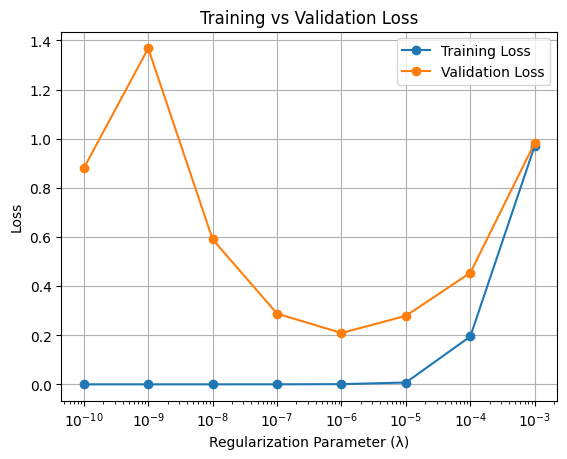

In [40]:
import matplotlib.pyplot as plt

plt.plot(lambdas, train_errors, marker='o', label='Training Loss')
plt.plot(lambdas, val_errors, marker='o', label='Validation Loss')

plt.xscale('log')  # Logarithmic scale for lambda
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.grid()
plt.show()


In [36]:
model = classifier(epsilon=1e-8)
X1=np.array([[0.5, 0.7], [-0.25, 0.3]])
print(X1.shape)
Y1=np.array([1, -1]).reshape(-1,1)


theta=np.array([-0.3, 2, 1.5]).reshape(-1,1)
print(model.risk(theta,X1,Y1))

(2, 2)
2.675


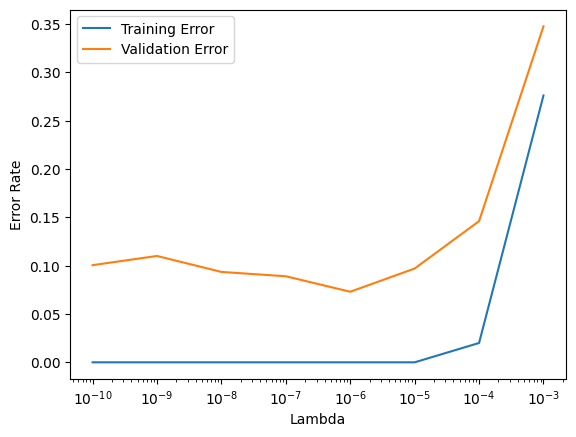

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Load data (already provided in your code)
data = np.load("/content/sample_data/data.npz")
Xtr, Ytr = data["XTr"], data["YTr"]
Xval, Yval = data["XVal"], data["YVal"]

model = classifier(epsilon=1e-8)

# Fit model for a range of lambda values
lambdas = np.logspace(-10, -3, 8)
train_errors, val_errors = [], []

for lam in lambdas:
    theta = model.fit(Xtr, Ytr, lam)
    train_pred = model.predict(theta, Xtr)
    val_pred = model.predict(theta, Xval)

    train_errors.append(np.mean(train_pred != Ytr))
    val_errors.append(np.mean(val_pred != Yval))

# Plot training and validation errors
plt.plot(lambdas, train_errors, label='Training Error')
plt.plot(lambdas, val_errors, label='Validation Error')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Error Rate')
plt.legend()
plt.show()


In [28]:
model = classifier(epsilon=1e-8)
X1=np.array([[0.5, 0.7], [-0.25, 0.3]])
print(X1.shape)
Y1=np.array([1, -1]).reshape(-1,1)


theta=np.array([-0.3, 2, 1.5]).reshape(-1,1)
print(model.risk(theta,X1,Y1))

(2, 2)
YG =  [[ 2.75 ]
 [-2.175]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

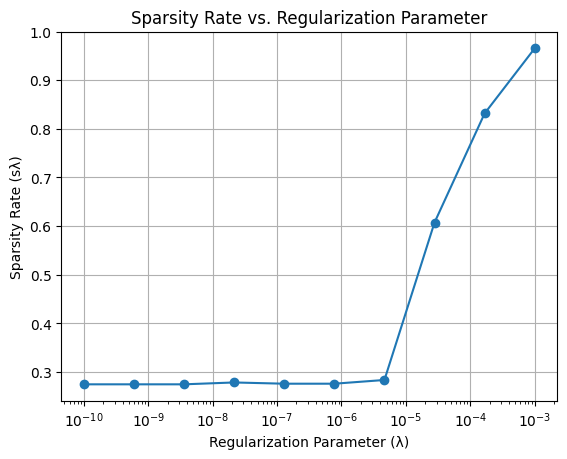

In [59]:
def compute_sparsity_rate(theta, threshold=0.01):
    """Compute the sparsity rate of the parameter vector."""
    # Count how many weights are less than the threshold
    num_small_weights = np.sum(np.abs(theta[:-1]) < threshold)  # Exclude bias
    total_weights = len(theta) - 1  # Exclude bias
    sparsity_rate = num_small_weights / total_weights  # Fraction of small weights
    return sparsity_rate

lambdas = np.logspace(-10, -3, 10)  # Regularization parameter values
sparsity_rates = []  # To store sparsity rates for each lambda

for lam in lambdas:
    theta = model.fit(Xtr, Ytr, lam)  # Fit the model
    sparsity_rate = compute_sparsity_rate(theta)
    sparsity_rates.append(sparsity_rate)

# Plotting
plt.plot(lambdas, sparsity_rates, marker='o')
plt.xscale('log')  # Use logarithmic scale for lambda
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('Sparsity Rate (sλ)')
plt.title('Sparsity Rate vs. Regularization Parameter')
plt.grid()
plt.show()

In [42]:
####.  (i)


Xte, Yte = data["XTe"], data["YTe"]

# Assume best_lambda is identified as λ*
best_lambda = lambdas[np.argmin(val_errors)]  # Replace with actual code

# Fit model with best lambda
theta_best = model.fit(Xtr, Ytr, best_lambda)

# Predictions
train_pred = model.predict(theta_best, Xtr)
val_pred = model.predict(theta_best, Xval)
test_pred = model.predict(theta_best, Xte)

# Compute error rates
train_error_rate = np.mean(train_pred != Ytr)
val_error_rate = np.mean(val_pred != Yval)
test_error_rate = np.mean(test_pred != Yte)

# Print results in decimal notation
print(f"Training Error Rate: {train_error_rate:.6f}")
print(f"Validation Error Rate: {val_error_rate:.4f}")
print(f"Test Error Rate: {test_error_rate:.4f}")


Training Error Rate: 0.000000
Validation Error Rate: 0.0730
Test Error Rate: 0.0875


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("/content/sample_data/data.npz")

Xtr = data["XTr"] #Train inputs
Ytr = data["YTr"] #Train labels

Xval = data["XVal"]#Val inputs
Yval = data["YVal"] #Val labels

Xte = data["XTe"] #Test inputs
Yte = data["YTe"] #Test labels


#Set up example model and parameters
model = classifier(epsilon=1e-8)
N,D   = Xtr.shape
theta = np.zeros((D+1,1))
lam   = 1

#Example call to discriminant
out = model.discriminant(theta,Xtr[:2,:])
print("Discriminant:",out.T)

#Example call to predict
out = model.predict(theta,Xtr[:2,:])
print("Predict:",out.T)

#Example call to risk
out = model.risk(theta,Xtr[:2,:],Ytr[:2,:])
print("Risk:",out)

#Example call to regularizer
out = model.regularizer(theta)
print("Regularizer:",out)

#Example call to regularized risk
out = model.regularized_risk(theta,Xtr[:2,:],Ytr[:2,:],lam)
print("Regularized Risk:",out)

#Example call to risk_grad
out = model.risk_grad(theta,Xtr[:2,:],Ytr[:2,:])
print("Risk Gradient:",out.T)

#Example call to regularizer_grad
out = model.regularizer_grad(theta)
print("Regularizer Gradient:",out.T)

#Example call to regularized risk_grad
out = model.regularized_risk_grad(theta,Xtr[:2,:],Ytr[:2,:],lam)
print("Regularized Risk Gradient:",out.T)

#Example call to fit:
out=model.fit(Xtr[:2,:],Ytr[:2,:],lam)
print("Output of Fit:",out.T)

[[0.5]
 [0.2]]
(array([], dtype=int64), array([], dtype=int64))
(array([0, 1]), array([0, 0]))


In [21]:
B = np.array([[[1, 2], [3, 4]],
              [[5, 6], [7, 8]]])

np.where(B>4)

(array([1, 1, 1, 1]), array([0, 0, 1, 1]), array([0, 1, 0, 1]))

In [55]:
a = np.arange(12).reshape(4, 3)
b = np.array([1, 2, 3]).reshape(-1, 1)

print(a)
sol = np.dot(a,b)+3
print(sol)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[11]
 [29]
 [47]
 [65]]


array([[0, 0],
       [0, 1]])